In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
data = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [14]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [15]:
data = data['Text'].apply(clean)
data

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [18]:
#Word frequency
freq = pd.Series(' '.join(data).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [16]:
import nltk

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading movie_reviews: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading conll2000: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading brown: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


NameError: name 'stopwords' is not defined

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data = data.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [27]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data).split()).value_counts()[:20] # for top 20
freq_Sw

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
would               40
dtype: int64

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data)
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aber,1,0.000075
1,able,6,0.000449
2,abo,1,0.000075
3,aboard,1,0.000075
4,abort,3,0.000224
5,absence,1,0.000075
6,absolute,1,0.000075
7,absolutely,15,0.001121
8,absorb,1,0.000075
9,absorption,1,0.000075


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data)
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [33]:
top2_words = get_top_n2_words(data, n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13


[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'we re'),
 Text(2, 0, 'spacex falcon'),
 Text(3, 0, 'erdayastronaut spacex'),
 Text(4, 0, 'crew dragon'),
 Text(5, 0, 'pretty much'),
 Text(6, 0, 'rt nasa'),
 Text(7, 0, 'waemd spacex'),
 Text(8, 0, 'you re'),
 Text(9, 0, 'giga berlin'),
 Text(10, 0, 'first stage'),
 Text(11, 0, 'teslaratiteam teslarati'),
 Text(12, 0, 'nasa spacex'),
 Text(13, 0, 'falcon first'),
 Text(14, 0, 'next week'),
 Text(15, 0, 'erdayastronaut flcnhvy'),
 Text(16, 0, 'they re'),
 Text(17, 0, 'flcnhvy tesla'),
 Text(18, 0, 'coming soon'),
 Text(19, 0, 'spacex dragon')]

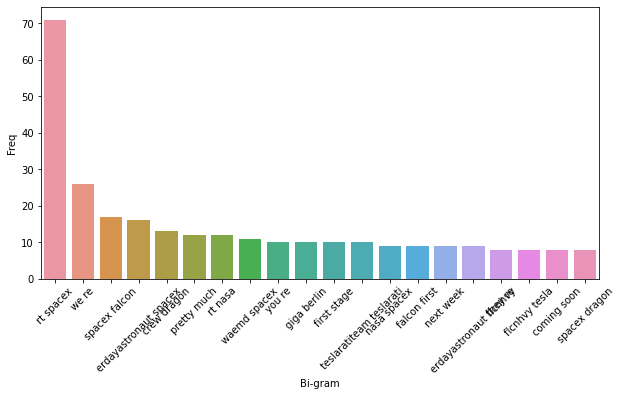

In [34]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [35]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [36]:
top3_words = get_top_n3_words(data, n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [37]:
top3_df

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
...,...,...
195,completed full duration,2
196,raptor vacuum engine,2
197,we ve ever,2
198,zogfotpik samiralyateem idaacarmack,2


[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'spacex falcon first'),
 Text(3, 0, 'thesheetztweetz waemd spacex'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'first stage landed'),
 Text(8, 0, 'rt spacex liftoff'),
 Text(9, 0, 'spacex spacexstarlink wanationalguard'),
 Text(10, 0, 'spacex felixschlang marcushousegame'),
 Text(11, 0, 'still love droneship'),
 Text(12, 0, 'rt spacex dragon'),
 Text(13, 0, 'dragon first operational'),
 Text(14, 0, 'first operational mission'),
 Text(15, 0, 'casparstanley ercxspace marcushousegame'),
 Text(16, 0, 'ercxspace marcushousegame felixschlang'),
 Text(17, 0, 'erdayastronaut joshbickett ajtourville'),
 Text(18, 0, 'joshbickett ajtourville spacex'),
 Text(19, 0, 'spacex falcon launches')]

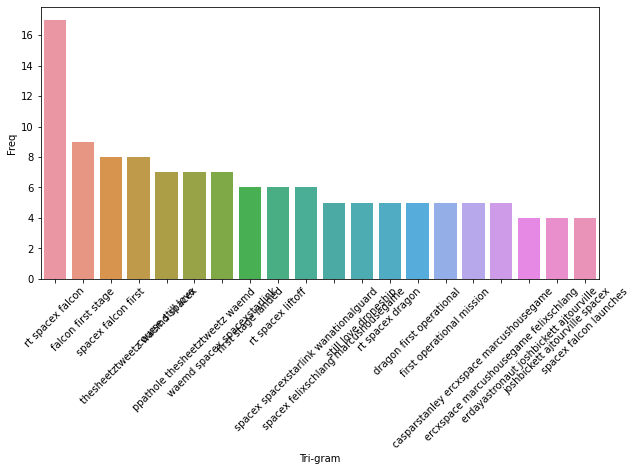

In [38]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [39]:
#world cloud
string_Total = " ".join(data)

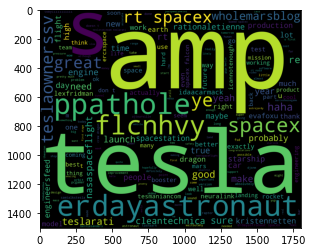

In [40]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
data = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
import re #regular expression
import string


def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 
data['Tweets'] = np.vectorize(remove_pattern)(data['Text'], "@[\w]*")
data.head(10)

,Text,Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge,\nAll thought he would..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent r...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [6]:
cleaned_data = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Tweets.split() if 'http' not in word]
    cleaned_data.append(' '.join(words_without_links))

data['Tweets'] = cleaned_data
data.head(10)

,Text,Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [8]:
data = data[data['Tweets']!='']
data.head(10)

,Text,Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [9]:
data.drop_duplicates(subset=['Tweets'], keep=False)
data.head(10)

,Text,Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [10]:
data = data.reset_index(drop=True)
data.head(10)

,Text,Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [11]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
data['Tweets'] = data['Tweets'].apply(lambda x: clean_text(x))
data.head(10)

,Text,Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [18]:
data['tokenized_tweets'] = data['Tweets'].apply(lambda x: nltk.word_tokenize(x))
data

,Text,Tweets,tokenized_tweets
0,@kunalb11 Im an alien,im an alien,"[im, an, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,"[ray, tracing, on, cyberpunk, with, hdr, is, n..."
2,@joerogan @Spotify Great interview!,great interview,"[great, interview]"
3,@gtera27 Doge is underestimated,doge is underestimated,"[doge, is, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,"[congratulations, tesla, china, for, amazing, ..."
...,...,...,...
1933,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pro...,"[true, it, sounds, so, surreal, but, the, nega..."
1934,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions befo...,"[make, sure, to, read, ur, terms, amp, conditi..."
1935,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,"[samwise, gamgee]"
1936,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is,"[altho, dumb, and, dumber, is]"


In [20]:
data.drop(['tokenized_tweets'],axis=1,inplace=True)

In [23]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_data=[]

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_data.append(' '.join(words_without_stopwords))
    
data['absolute_tweets'] = cleaned_data
data

,Text,Tweets,absolute_tweets
0,@kunalb11 Im an alien,im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...
...,...,...,...
1933,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pro...,true sounds surreal negative propaganda still ...
1934,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions befo...,make sure read ur terms amp conditions clickin...
1935,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,samwise gamgee
1936,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is,altho dumb dumber


In [25]:
tokenized_tweet = data['absolute_tweets'].apply(lambda x: x.split())
tokenized_tweet.head(10)

0                                         [im, alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulations, tesla, china, amazing, execu...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweets, definitely, represent, realwo...
9                      [entertaining, outcome, likely]
Name: absolute_tweets, dtype: object

In [28]:
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...


0                                         [im, alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulation, tesla, china, amazing, execut...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweet, definitely, represent, realwor...
9                      [entertaining, outcome, likely]
Name: absolute_tweets, dtype: object

In [29]:
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

data['absolute_tidy_tweets'] = tokenized_tweet
data.head(10)

,Text,Tweets,absolute_tweets,absolute_tidy_tweets
0,@kunalb11 Im an alien,im an alien,im alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...,congratulation tesla china amazing execution l...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,happy new year ox,happy new year ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...,frodo underdoge thought would fail,frodo underdoge thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,thanks,thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...,indeed tweets definitely represent realworld t...,indeed tweet definitely represent realworld ti...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome likely,entertaining outcome likely


In [34]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments_using_SIA = data.absolute_tidy_tweets.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,absolute_tidy_tweets
pos,1737
neg,201


In [39]:
data.Tweets[3]

'doge is underestimated'

In [40]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(data.absolute_tweets[3])

{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}

In [42]:
df=pd.DataFrame()
df['Tweets'] = data.absolute_tidy_tweets
df['scores'] = data['Tweets'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Tweets,scores
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp..."


In [43]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Tweets,scores,compound
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271


In [44]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Tweets,scores,compound,sentiment
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,Negative
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271,Positive
...,...,...,...,...
1933,true sound surreal negative propaganda still a...,"{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",-0.4215,Negative
1934,make sure read ur term amp condition clicking ...,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.5994,Positive
1935,samwise gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1936,altho dumb dumber,"{'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'comp...",-0.7003,Negative


In [45]:
data.describe()

,Text,Tweets,absolute_tweets,absolute_tidy_tweets
count,1938,1938,1938,1938
unique,1936,1661,1624,1624
top,The most entertaining outcome is the most likely,,,
freq,2,80,124,124


In [47]:
temp = df.groupby('sentiment').count()['Tweets'].reset_index().sort_values(by='Tweets',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Tweets
2,Positive,873
1,Neutral,836
0,Negative,229


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compound', ylabel='Density'>

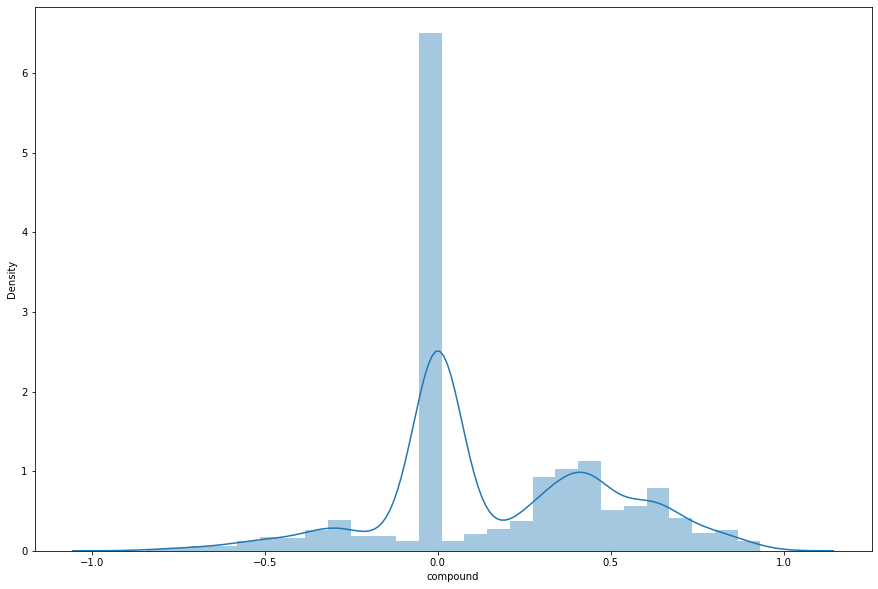

In [48]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

<AxesSubplot:ylabel='compound'>

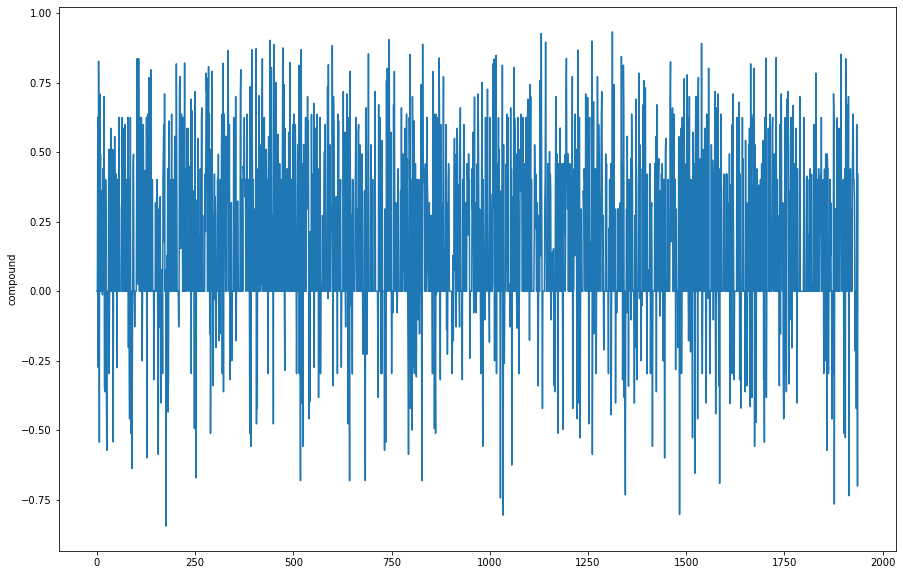

In [49]:
plt.figure(figsize=(15,10))
sns.lineplot(y='compound',x=df.index,data=df)

In [51]:
df['word_count'] = df['Tweets'].apply(lambda x: len(str(x).split(" ")))
df[['Tweets','word_count']].head()

,Tweets,word_count
0,im alien,2
1,ray tracing cyberpunk hdr nextlevel tried,6
2,great interview,2
3,doge underestimated,2
4,congratulation tesla china amazing execution l...,9


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

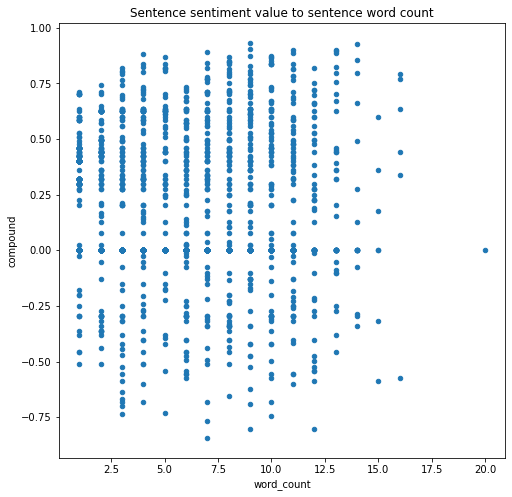

In [52]:
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')